# STEP 2 - Central Model

Next, a central model is evaluated for the 4square dataset location prediction.

## Imports

In [1]:
import tensorflow as tf
from tensorflow import feature_column
import pandas as pd
import numpy as np
import import_ipynb

In [2]:
from model_helper import ModelHelper

importing Jupyter notebook from model_helper.ipynb


## Central Model

This model is roughly the same model as used for the categories and NYC taxi data.

In [3]:
df = pd.read_csv("./4square/processed_transformed_locations.csv")
df.head(100)

,location_id,user_id,clock_sin,clock_cos,day_sin,day_cos,month_sin,month_cos,week_day_sin,week_day_cos
0,0,470,-1.000000,0.000654,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
1,1,979,-0.999998,0.001818,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
2,2,69,-0.999945,0.010472,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
3,3,395,-0.999931,0.011708,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
4,0,87,-0.999914,0.013090,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...
95,33,445,-0.959601,0.281365,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
96,0,235,-0.956326,0.292302,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
97,1,118,-0.955729,0.294249,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349
98,20,1054,-0.955407,0.295291,0.587785,0.809017,0.866025,-0.5,0.781831,0.62349


In [4]:
# the number of different locations defines the vocabulary size
locations = df.location_id
vocab_size = locations.nunique()

print('vocabulary size:', vocab_size)

vocabulary size: 141


In [5]:
mh = ModelHelper(df, 17)
mh.set_vocab_size(vocab_size)

Set column names.

In [6]:
mh.set_target_column_name('location_id')

# List of numerical column names
numerical_column_names = ['clock_sin', 'clock_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'week_day_sin', 'week_day_cos']
mh.set_numerical_column_names(numerical_column_names)

column_names = ['location_id'] + numerical_column_names
mh.set_column_names(column_names)

mh.set_client_column_name('user_id')
mh.set_client_column_ids()

An array is created containing all visited locations for every user.
The original data is sorted by time (ascending).
Thus, the array contains a sequence of visited locations by user.

In [7]:
mh.create_users_locations_from_df()

100%|██████████| 1083/1083 [00:00<00:00, 2263.92it/s]


[       location_id  user_id  clock_sin  clock_cos       day_sin   day_cos  \
 0                0      470  -1.000000   0.000654  5.877853e-01  0.809017   
 626              4      470  -0.102069   0.994777  5.877853e-01  0.809017   
 650              4      470  -0.057709   0.998333  5.877853e-01  0.809017   
 652              4      470  -0.055531   0.998457  5.877853e-01  0.809017   
 654              0      470  -0.053135   0.998587  5.877853e-01  0.809017   
 ...            ...      ...        ...        ...           ...       ...   
 60782            0      470  -1.000000   0.000800  7.431448e-01 -0.669131   
 64836            3      470  -0.966170  -0.257906  4.067366e-01 -0.913545   
 64980            0      470  -1.000000   0.000873  4.067366e-01 -0.913545   
 67196            0      470  -1.000000   0.000800  2.079117e-01 -0.978148   
 69288            0      470  -1.000000   0.000945  5.665539e-16 -1.000000   
 
        month_sin  month_cos  week_day_sin  week_day_cos  
 0 

It is necessary to first split the data in train, valid and test for each user.
Then, these are merged together again later on.
This is done to ensure that the sequences are kept together and not split randomly for the users.

In [8]:
mh.concat_split_users_locations()

In [9]:
print(len(mh.df_train), 'train examples')
print(len(mh.df_val), 'validation examples')
print(len(mh.df_test), 'test examples')

144763 train examples
36729 validation examples
45936 test examples


Perfect.

In [10]:
#mh.split_data_sliding()
mh.split_data()
print(len(mh.list_test))
mh.list_test[0]

2703


,location_id,clock_sin,clock_cos,day_sin,day_cos,month_sin,month_cos,week_day_sin,week_day_cos
31429,13,0.270320,0.962770,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31480,3,0.439613,0.898187,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31728,13,0.953323,-0.301954,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31729,5,0.952971,-0.303063,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
31916,5,0.057782,-0.998329,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32041,5,-0.153561,-0.988139,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32044,0,-0.158086,-0.987425,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32045,5,-0.164976,-0.986298,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32052,5,-0.170066,-0.985433,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000
32055,3,-0.173147,-0.984896,-0.994522,0.104528,0.866025,-0.5,0.000000,1.000000


In [11]:
mh.set_batch_size(16)
mh.create_and_batch_datasets(multi_target=False)

In [12]:
EMBEDDING_DIM = 256

rnn_units1 = 256
rnn_units2 = 128

# Create a model
def create_keras_model():

  vocab_size = mh.vocab_size
  N = mh.total_window_length
  batch_size = mh.batch_size
  # Shortcut to the layers package
  l = tf.keras.layers

  # List of numeric feature columns to pass to the DenseLayer
  numeric_feature_columns = []

  # Handling numerical columns
  for header in numerical_column_names:
		# Append all the numerical columns defined into the list
    numeric_feature_columns.append(feature_column.numeric_column(header, shape=N-1))

  feature_inputs={}
  for c_name in numerical_column_names:
    feature_inputs[c_name] = tf.keras.Input((N-1,), batch_size=batch_size, name=c_name)

  # We cannot use an array of features as always because we have sequences
  # We have to do one by one in order to match the shape
  num_features = []
  for c_name in numerical_column_names:
    f =  feature_column.numeric_column(c_name, shape=(N-1))
    feature = l.DenseFeatures(f)(feature_inputs)
    feature = tf.expand_dims(feature, -1)
    num_features.append(feature)

  # Declare the dictionary for the locations sequence as before
  sequence_input = {
      'location_id': tf.keras.Input((N-1,), batch_size=batch_size, dtype=tf.dtypes.int32, name='location_id') # add batch_size=batch_size in case of stateful GRU
  }

  # Handling the categorical feature sequence using one-hot
  location_one_hot = feature_column.sequence_categorical_column_with_vocabulary_list(
      'location_id', [i for i in range(vocab_size)])

  # Embed the one-hot encoding
  location_embed = feature_column.embedding_column(location_one_hot, EMBEDDING_DIM)

  # With an input sequence we can't use the DenseFeature layer, we need to use the SequenceFeatures
  sequence_features, sequence_length = tf.keras.experimental.SequenceFeatures(location_embed)(sequence_input)

  input_sequence = l.Concatenate(axis=2)([sequence_features] + num_features)


  # Rnn
  recurrent = l.GRU(rnn_units1,
                    batch_size=batch_size, #in case of stateful
                    return_sequences=True,
                    stateful=True,
                    recurrent_initializer='glorot_uniform')(input_sequence)

  recurrent_2 = l.GRU(rnn_units2,
                      batch_size=batch_size, #in case of stateful
                      stateful=True,
                      recurrent_initializer='glorot_uniform')(recurrent)


  # Softmax output layer
  # Last layer with an output for each places
  output = l.Dense(vocab_size, activation='softmax')(recurrent_2)

	# To return the Model, we need to define its inputs and outputs
	# In out case, we need to list all the input layers we have defined
  inputs = list(feature_inputs.values()) + list(sequence_input.values())

	# Return the Model
  return tf.keras.Model(inputs=inputs, outputs=output)

In [13]:
mh.assign_model(create_keras_model())

In [14]:
mh.compile_model()
mh.fit_model()

Epoch 1/20
532/532 [==============================] - 6s 10ms/step - loss: 2.4901 - sparse_categorical_accuracy: 0.4037 - val_loss: 2.2212 - val_sparse_categorical_accuracy: 0.4528
Epoch 2/20
532/532 [==============================] - 5s 9ms/step - loss: 1.9299 - sparse_categorical_accuracy: 0.4973 - val_loss: 2.0827 - val_sparse_categorical_accuracy: 0.4745
Epoch 3/20
532/532 [==============================] - 5s 10ms/step - loss: 1.7391 - sparse_categorical_accuracy: 0.5211 - val_loss: 2.0275 - val_sparse_categorical_accuracy: 0.4838
Epoch 4/20
532/532 [==============================] - 5s 10ms/step - loss: 1.5999 - sparse_categorical_accuracy: 0.5470 - val_loss: 2.0268 - val_sparse_categorical_accuracy: 0.4847
Epoch 5/20
532/532 [==============================] - 5s 10ms/step - loss: 1.4760 - sparse_categorical_accuracy: 0.5752 - val_loss: 2.0455 - val_sparse_categorical_accuracy: 0.4833
Epoch 6/20
532/532 [==============================] - 5s 10ms/step - loss: 1.3434 - sparse_categ

In [15]:
mh.evaluate_model()

168/168 [==============================] - 1s 3ms/step - loss: 1.9601 - sparse_categorical_accuracy: 0.4810


In [16]:
mh.model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
clock_cos (InputLayer)          [(16, 16)]           0                                            
__________________________________________________________________________________________________
clock_sin (InputLayer)          [(16, 16)]           0                                            
__________________________________________________________________________________________________
day_cos (InputLayer)            [(16, 16)]           0                                            
__________________________________________________________________________________________________
day_sin (InputLayer)            [(16, 16)]           0                                            
_______________________________________________________________________________________

## Evaluation of the model prediction

A manual evaluation of the model prediction is executed.
An attempt is made to understand patterns that the model has learned to reach a good prediction quality.
In case of the original NYC dataset, the evaluation showed that in most cases the network simply predicts the taxi to not leave the current area.
As a result, a high prediction quality of around 30 percent could be reached.
It is interesting to see whether this also applies to the 4square locations as well.

In [17]:
def print_info(T):
    print('Element #0:', T[0])
    print('Shape:', T.shape)

In [18]:
logits = mh.model.predict(mh.test_dataset)
print_info(logits)

Element #0: [2.92363137e-01 1.55632826e-03 1.82804686e-03 5.51333189e-01
 5.88643877e-03 8.30562040e-02 1.18151962e-04 1.11308007e-04
 2.18641199e-03 1.86013189e-04 2.13586653e-04 2.44985531e-05
 5.29273739e-03 2.03890838e-02 5.93110417e-06 2.85791589e-06
 2.54459101e-05 1.29049201e-03 3.34657598e-05 2.20916045e-04
 3.82722028e-05 2.49270070e-05 4.05054481e-04 9.12599808e-06
 1.47726946e-03 7.31186336e-03 1.32672617e-03 7.64755605e-05
 4.92449896e-03 4.03032827e-05 1.87800208e-03 2.24921787e-05
 7.65937602e-06 2.65319925e-03 1.14727889e-04 5.28182311e-04
 7.27909264e-06 5.05513090e-05 5.14265912e-06 3.34812119e-03
 3.36728262e-05 4.69838502e-04 8.46404000e-05 4.53548419e-05
 2.42820126e-04 2.75777779e-06 9.84471990e-05 1.91012496e-05
 3.96920484e-04 1.27563844e-05 2.57681502e-04 4.23201527e-06
 1.43323035e-04 5.44000723e-05 1.18525299e-04 5.57958156e-05
 6.83217222e-05 1.94934939e-04 1.42086647e-04 4.67758888e-04
 8.86887545e-04 9.12628078e-04 1.09764114e-04 6.98104486e-05
 1.06322868e

In [19]:
predictions = tf.nn.softmax(logits, axis=1)
print_info(predictions)

Element #0: tf.Tensor(
[0.00941813 0.00704156 0.00704347 0.01220208 0.00707211 0.00763948
 0.00703144 0.00703139 0.00704599 0.00703191 0.00703211 0.00703078
 0.00706792 0.00717543 0.00703065 0.00703063 0.00703079 0.00703968
 0.00703084 0.00703216 0.00703088 0.00703078 0.00703345 0.00703067
 0.007041   0.0070822  0.00703994 0.00703114 0.00706531 0.00703089
 0.00704382 0.00703076 0.00703066 0.00704928 0.00703141 0.00703432
 0.00703066 0.00703096 0.00703064 0.00705419 0.00703084 0.00703391
 0.0070312  0.00703093 0.00703231 0.00703063 0.0070313  0.00703074
 0.0070334  0.0070307  0.00703242 0.00703064 0.00703161 0.00703099
 0.00703144 0.007031   0.00703109 0.00703198 0.00703161 0.0070339
 0.00703684 0.00703703 0.00703138 0.0070311  0.00703068 0.00703113
 0.00703132 0.00703079 0.00703187 0.00703062 0.00703062 0.00703097
 0.0070308  0.00703064 0.00703068 0.00703072 0.00703068 0.00703199
 0.00703069 0.0070312  0.00703413 0.00703077 0.00703209 0.00703068
 0.00703063 0.00703094 0.00703069 0.0070

In [20]:
predicted_classes = np.argmax(predictions, 1)
print_info(predicted_classes)

Element #0: 3
Shape: (2688,)


In [21]:
actual_values = []
X_loc = []
for x, y in mh.test_dataset.unbatch():
    actual_values.append(y.numpy())
    X_loc.append(x['location_id'].numpy())

actual_values = np.array(actual_values)
print(actual_values)
X_loc = np.array(X_loc)

diff = actual_values - predicted_classes
print(diff.shape)
unique, counts = np.unique(diff, return_counts=True)

print('actual_values')
print_info(actual_values)
print('predicted_classes')
print_info(predicted_classes)
print('diff')
print_info(diff)

[ 0  3  1 ... 87 40  8]
(2688,)
actual_values
Element #0: 0
Shape: (2688,)
predicted_classes
Element #0: 3
Shape: (2688,)
diff
Element #0: -3
Shape: (2688,)


In [22]:
wrong = np.count_nonzero(diff)
size = diff.shape[0]
correct =  size - wrong
acc = correct / size
print('# correct Predictions : ', correct)
print('# wrong Predictions : ', wrong)
print('accuracy: ', acc)

# correct Predictions :  1292
# wrong Predictions :  1396
accuracy:  0.4806547619047619


In [23]:
res = pd.DataFrame(predicted_classes)
unique, counts = np.unique(res, return_counts=True)
print(unique)
print(counts)

[  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38
  39  40  41  42  43  44  47  48  50  51  52  53  54  55  56  57  59  60
  66  67  69  72  74  76  77  78  79  81  89  91  92  95  96  99 114 116
 124 131]
[750  75  62 359 119 334  10  49   5  26   2  66  96   5  14  40  45   6
  17  17   2   2   1  32  18   4 104   8  60  10   3 103  13   5  10   1
  15   2   9   5   2  11   2  18   4   1  27   6   6   4   4   1   5  23
   8   5   1   2   1   4   5   3   1   3   2  10   8   2   1   9   1   2
   1   1]


Almost all classes were predicted. Exceptions include the least used classes.

In [24]:
res = pd.DataFrame(actual_values)
unique, counts = np.unique(res, return_counts=True)
print(unique)
print(counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  38  39  40  41  42  43  44  45  46  47  48  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  65  66  67  68  69  70  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94
  96  97  98  99 102 103 105 106 108 109 110 111 112 113 114 115 116 121
 128 130 137]
[578  67  60 347 109 391   3   2  38   6  13   7  95 151   3   4  45  33
   9  15  14   5  11   6   8  45  16   3  74   7  78  13   4  89  11  13
   4   2  14   6   5  13   5   3   1   3   8   9   8   3  32   9   7   7
   2  10   4   2  14   2   3   5   1  14   5   5   3   1   3   1   2   1
   7   9   4   3   3   7   3   1   1   3   2   4   1   5   4   4   2   2
   2   1   2   3   4   2   1   2   1   1   1   1   1   1   1   2   2   1
   2   1   1]


Classes 0, 4 and 6 are very dominant.
These areas are visited primarily.
As a result, the prediction quality increases as the algorithm can learn to focus on those.

In [25]:
for i in range(0,20):
    print('Prediction #', i)
    print('Actual value: ', actual_values[i])
    print('Predicted value: ', predicted_classes[i])

Prediction # 0
Actual value:  0
Predicted value:  3
Prediction # 1
Actual value:  3
Predicted value:  0
Prediction # 2
Actual value:  1
Predicted value:  1
Prediction # 3
Actual value:  0
Predicted value:  1
Prediction # 4
Actual value:  2
Predicted value:  2
Prediction # 5
Actual value:  2
Predicted value:  2
Prediction # 6
Actual value:  25
Predicted value:  3
Prediction # 7
Actual value:  2
Predicted value:  3
Prediction # 8
Actual value:  2
Predicted value:  3
Prediction # 9
Actual value:  0
Predicted value:  13
Prediction # 10
Actual value:  5
Predicted value:  0
Prediction # 11
Actual value:  28
Predicted value:  0
Prediction # 12
Actual value:  4
Predicted value:  0
Prediction # 13
Actual value:  5
Predicted value:  5
Prediction # 14
Actual value:  4
Predicted value:  4
Prediction # 15
Actual value:  0
Predicted value:  4
Prediction # 16
Actual value:  4
Predicted value:  4
Prediction # 17
Actual value:  5
Predicted value:  4
Prediction # 18
Actual value:  10
Predicted value:  0

In [26]:
Y = np.expand_dims(actual_values, -1)
print('X_loc.shape ', X_loc.shape)
print('Y.shape ', Y.shape)
X_Y = np.concatenate((X_loc, Y), axis=1)
print('X_Y.shape: ', X_Y.shape)
X_Y[:10]

X_loc.shape  (2688, 16)
Y.shape  (2688, 1)
X_Y.shape:  (2688, 17)


array([[13,  3, 13,  5,  5,  5,  0,  5,  5,  3,  3,  0,  3,  0,  5,  3,
         0],
       [ 3,  0,  3,  0,  3,  0,  3,  0,  3,  0,  3,  0,  0,  0,  3,  0,
         3],
       [ 3,  0,  3,  0,  0,  0,  1,  1,  1, 80,  1,  1,  0,  5,  1,  1,
         1],
       [ 0, 80,  1,  1,  0, 80,  1,  1,  0, 80,  1,  1,  0,  0, 80,  1,
         0],
       [80, 80,  1,  0,  0,  0, 80,  1,  2,  2,  2,  2, 25, 25,  2,  2,
         2],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2],
       [ 2,  2,  3,  2,  2,  3,  2,  2, 30,  2, 30,  2,  2,  3,  3,  2,
        25],
       [ 2,  2,  2, 30,  2, 30,  3,  2,  2,  2,  2,  3,  3, 30,  2,  3,
         2],
       [ 2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  4,  2,  3,  3,
         2],
       [30,  3,  3,  3, 13, 17, 13,  3, 28,  5, 13,  0,  5, 13, 13, 13,
         0]], dtype=int64)

In [27]:
columns = []
for i in range(0,16):
    columns.append('loc_' + str(i))
columns.append('y_true')
columns

['loc_0',
 'loc_1',
 'loc_2',
 'loc_3',
 'loc_4',
 'loc_5',
 'loc_6',
 'loc_7',
 'loc_8',
 'loc_9',
 'loc_10',
 'loc_11',
 'loc_12',
 'loc_13',
 'loc_14',
 'loc_15',
 'y_true']

In [28]:
df = pd.DataFrame(X_Y, columns = columns)
df

,loc_0,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6,loc_7,loc_8,loc_9,loc_10,loc_11,loc_12,loc_13,loc_14,loc_15,y_true
0,13,3,13,5,5,5,0,5,5,3,3,0,3,0,5,3,0
1,3,0,3,0,3,0,3,0,3,0,3,0,0,0,3,0,3
2,3,0,3,0,0,0,1,1,1,80,1,1,0,5,1,1,1
3,0,80,1,1,0,80,1,1,0,80,1,1,0,0,80,1,0
4,80,80,1,0,0,0,80,1,2,2,2,2,25,25,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,60,3,2,2,13,17,3,30,30,2,2,3,3,30,3,3,3
2684,2,3,3,3,3,3,3,3,3,2,2,17,17,3,3,2,2
2685,3,2,17,2,3,30,3,25,25,5,3,3,3,87,14,87,87
2686,14,97,14,15,15,97,40,40,40,15,44,14,26,26,40,40,40


In [29]:
df['y_pred'] = predicted_classes
df

,loc_0,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6,loc_7,loc_8,loc_9,loc_10,loc_11,loc_12,loc_13,loc_14,loc_15,y_true,y_pred
0,13,3,13,5,5,5,0,5,5,3,3,0,3,0,5,3,0,3
1,3,0,3,0,3,0,3,0,3,0,3,0,0,0,3,0,3,0
2,3,0,3,0,0,0,1,1,1,80,1,1,0,5,1,1,1,1
3,0,80,1,1,0,80,1,1,0,80,1,1,0,0,80,1,0,1
4,80,80,1,0,0,0,80,1,2,2,2,2,25,25,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,60,3,2,2,13,17,3,30,30,2,2,3,3,30,3,3,3,3
2684,2,3,3,3,3,3,3,3,3,2,2,17,17,3,3,2,2,3
2685,3,2,17,2,3,30,3,25,25,5,3,3,3,87,14,87,87,99
2686,14,97,14,15,15,97,40,40,40,15,44,14,26,26,40,40,40,15


In [30]:
df['correct'] = df['y_true'] - df['y_pred']

def reduce01 (val):
    if val == 0:
        return True
    else:
        return False

df['correct'] = df['correct'].map(reduce01)
df

,loc_0,loc_1,loc_2,loc_3,loc_4,loc_5,loc_6,loc_7,loc_8,loc_9,loc_10,loc_11,loc_12,loc_13,loc_14,loc_15,y_true,y_pred,correct
0,13,3,13,5,5,5,0,5,5,3,3,0,3,0,5,3,0,3,False
1,3,0,3,0,3,0,3,0,3,0,3,0,0,0,3,0,3,0,False
2,3,0,3,0,0,0,1,1,1,80,1,1,0,5,1,1,1,1,True
3,0,80,1,1,0,80,1,1,0,80,1,1,0,0,80,1,0,1,False
4,80,80,1,0,0,0,80,1,2,2,2,2,25,25,2,2,2,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,60,3,2,2,13,17,3,30,30,2,2,3,3,30,3,3,3,3,True
2684,2,3,3,3,3,3,3,3,3,2,2,17,17,3,3,2,2,3,False
2685,3,2,17,2,3,30,3,25,25,5,3,3,3,87,14,87,87,99,False
2686,14,97,14,15,15,97,40,40,40,15,44,14,26,26,40,40,40,15,False


In [31]:
def fill_missing(df, matrix, column_name):
    columns = set(df['y_pred'].values) | set(df[column_name].values)
    columns = list(columns)
    matrix = matrix.reindex(columns = columns)
    matrix = np.transpose(matrix)
    matrix = matrix.reindex(columns = columns)
    matrix = np.transpose(matrix)
    matrix[np.isnan(matrix)] = 0
    return matrix

In [32]:
matrix = df.groupby(['y_pred', 'loc_15']).size().unstack(fill_value=0, level=0)
matrix = fill_missing(df, matrix, 'loc_15')
matrix

y_pred,0,1,2,3,4,5,6,7,8,9,...,110,111,114,116,120,124,128,129,131,140
loc_15,,,,,,,,,,,,,,,,,,,,,
0,538.0,1.0,1.0,17.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,58.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,49.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.0,3.0,1.0,268.0,3.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.0,7.0,2.0,7.0,88.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


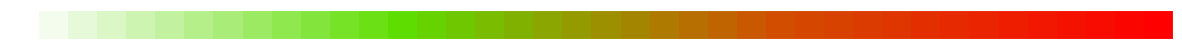

In [33]:
from colour import Color
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

def make_Ramp( ramp_colors ):

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

custom_ramp = make_Ramp( ['#ffffff', '#5ede00', '#d24e01', '#ff0000'] )

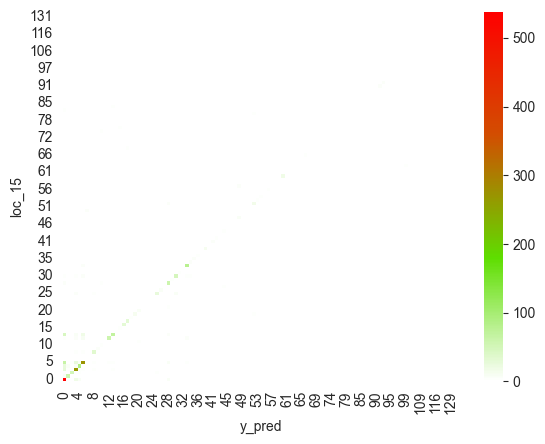

In [34]:
import seaborn as sns

ax = sns.heatmap(matrix,  cmap=custom_ramp)
ax.invert_yaxis()

The model often predicts the user to stay in the same location.
This is similar to the NYC taxi dataset.
In this case, the fact that the user also often stays in the same location for multiple checkins results in a higher accuracy.
Furthermore, the predictions where the user changes the location are also mostly accurate.
This was not the case for the NYC taxi data.

In [35]:
matrix = df.groupby(['y_pred', 'loc_0']).size().unstack(fill_value=0, level=0)
matrix = fill_missing(df, matrix, 'loc_0')
matrix

y_pred,0,1,2,3,4,5,6,7,8,9,...,110,111,112,114,115,116,118,124,128,131
loc_0,,,,,,,,,,,,,,,,,,,,,
0,300.0,19.0,3.0,65.0,23.0,53.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.0,24.0,0.0,2.0,2.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,38.0,9.0,5.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85.0,4.0,2.0,142.0,8.0,21.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.0,2.0,3.0,9.0,32.0,10.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


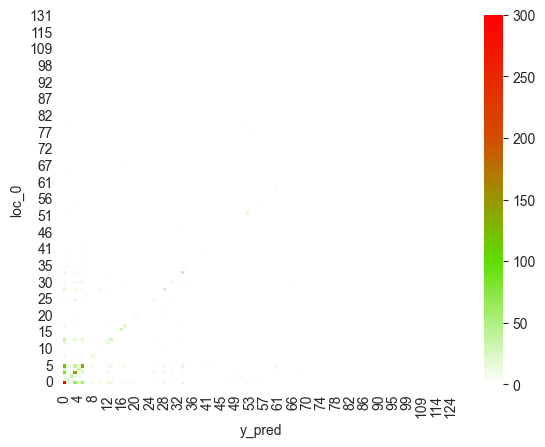

In [36]:
import seaborn as sns

ax = sns.heatmap(matrix,  cmap=custom_ramp)
ax.invert_yaxis()

The first location does not have a big impact on the prediction of the next location, as expected.

In [37]:
matrix = df.groupby(['y_pred', 'y_true']).size().unstack(fill_value=0, level=0)
matrix = fill_missing(df, matrix, 'y_true')
matrix

y_pred,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,121,124,128,130,131,137
y_true,,,,,,,,,,,,,,,,,,,,,
0,381.0,10.0,1.0,52.0,27.0,40.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.0,42.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,41.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86.0,4.0,4.0,186.0,6.0,20.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,5.0,3.0,7.0,53.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


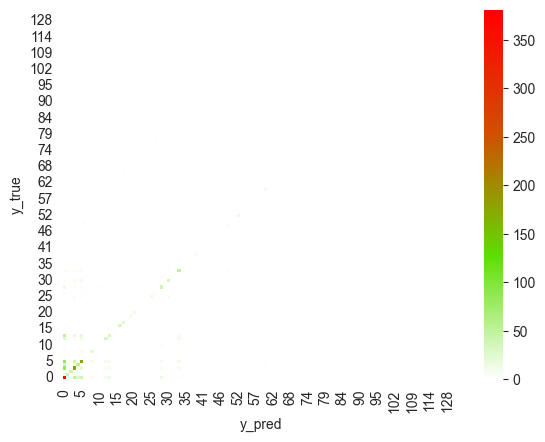

In [38]:
import seaborn as sns

ax = sns.heatmap(matrix,  cmap=custom_ramp)
ax.invert_yaxis()

The dominant classes were predicted correctly in many cases.
Also, the most wrong predictions can be found here.
This is expected and explains the high prediction quality.
The neural network for location prediction found similar patterns than it did for the NYC taxi data.